# Assignment 7


## Library Installation (Optional)


In [1]:
# Where are you running this? Can be either 'local' or 'colab'
model_run_location = "colab"

# # Do you want to install the required packages?
# install_required_packages = False
install_required_packages = False if model_run_location == "local" else True

In [2]:
# # Install any required libraries not present in your working environment

if install_required_packages:
    # # Needed locally and in colab
    # !pip install torchsummary
    # !conda install -c frgfm torchscan

    import sys
    !{sys.executable} -m pip install torchsummary

    # # Only if you want to automate receptive field calculation
    # if model_run_location == 'colab':
    #     !{sys.executable} -m pip install torchscan
    # elif model_run_location == 'local':
    #     %conda install --yes --prefix {sys.prefix} -c frgfm torchscan

    # # Needed locally
    # !conda install -c conda-forge tqdm
    # !conda install -c anaconda ipywidgets

    if model_run_location == 'local':
        %conda install --yes --prefix {sys.prefix} -c conda-forge tqdm
        %conda install --yes --prefix {sys.prefix} -c anaconda ipywidgets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Mount Drive


In [3]:
# Mount google drive if running on colab
if model_run_location == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/WorkSpace/era-v1/Session 07/Submission

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/WorkSpace/era-v1/Session 07/Submission


## Import Libraries


In [4]:
# Import necessary modules (external libs)
from __future__ import print_function

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torchvision import transforms

In [5]:
# Import user defined modules
from model import Model02 as Net, plot_train_test_metrics, test_model, train_model
from utils import download_mnist_data, get_device, plot_sample_training_images

In [6]:
# Functionality to check cuda support and create device is now moved to utils.py
device_support, device = get_device()
print(f"Device created with {device_support}!")

Device created with cuda!


## Data Transformations


In [7]:
# Train and test data transformation steps now moved to apply_mnist_image_transformations()


def apply_mnist_image_transformations():
    """
    Function to apply the required transformations to the MNIST dataset.
    """
    # Apply the required transformations to the MNIST dataset
    train_transforms = transforms.Compose(
        [
            # Convert the images to tensors
            # normalize the images with mean and standard deviation from the whole dataset
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
        ]
    )

    # Test data transformations
    test_transforms = transforms.Compose(
        # Convert the images to tensors
        # normalize the images with mean and standard deviation from the whole dataset
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )

    return train_transforms, test_transforms


train_transforms, test_transforms = apply_mnist_image_transformations()

## Train/Test Split


In [8]:
data_path = "../data"
print(f"Train and test data path: {data_path}")

train_data, test_data = download_mnist_data(
    data_path, train_transforms, test_transforms
)

Train and test data path: ../data


## Dataloaders


In [9]:
# Set seed value for reproducibility
seed = 1

# For reproducibility
torch.manual_seed(seed)

if device_support == "cuda":
    torch.cuda.manual_seed(seed)

batch_size = 32

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(
    shuffle=True, batch_size=batch_size, num_workers=2, pin_memory=True
)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

## Sample Training Images


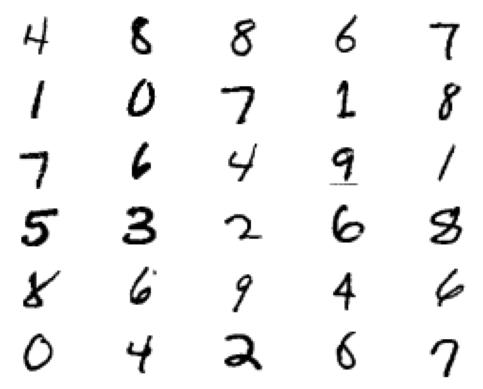

In [10]:
# Get a batch of training data from train_loader
batch_data, batch_label = next(iter(train_loader))

# Plot 60 sample images from the training data along with their labels
# plot_sample_training_images() imported from utils.py
fig = plot_sample_training_images(batch_data, num_images=30)
plt.show()

## Model Summary


In [11]:
# Model class is imported from model.py

# Send the model to device
model = Net().to(device)

# enable printing shape
model.print_shape = True

# Print the model summary by specifying the input size
summary(model, input_size=(1, 28, 28))

# disable printing shape for cleaner test train output
model.print_shape = False

torch.Size([2, 8, 26, 26])
torch.Size([2, 10, 12, 12])
torch.Size([2, 12, 8, 8])
torch.Size([2, 16, 4, 4])
torch.Size([2, 10, 1, 1])
torch.Size([2, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             720
              ReLU-4           [-1, 10, 24, 24]               0
         MaxPool2d-5           [-1, 10, 12, 12]               0
            Conv2d-6           [-1, 12, 10, 10]           1,080
              ReLU-7           [-1, 12, 10, 10]               0
            Conv2d-8             [-1, 12, 8, 8]           1,296
              ReLU-9             [-1, 12, 8, 8]               0
           Conv2d-10             [-1, 14, 6, 6]           1,512
             ReLU-11             [-1, 14, 6, 6]               0
           Con

## Metric Initialisation


In [12]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

## Train and Test


In [13]:
# Create optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# Specify the number of epochs
num_epochs = 15

for epoch in range(1, num_epochs + 1):
    if epoch == 1:
        print(f"\n\nBatch size: {batch_size}, Total epochs: {num_epochs}\n\n")

    # Print the current epoch
    print(f"Epoch {epoch}")
    # Train the model
    train_model(model, device, train_loader, optimizer, train_acc, train_losses)
    # Test the model
    test_model(model, device, test_loader, test_acc, test_losses)
    # Line break before next epoch
    print("\n")



Batch size: 32, Total epochs: 15


Epoch 1


Train: Loss=0.1569, Batch_id=1874, Accuracy=84.94: 100%|██████████| 1875/1875 [00:35<00:00, 52.50it/s]


Test set: Average loss: 0.0804, Accuracy: 9750/10000 (97.50%)


Epoch 2


Train: Loss=0.2811, Batch_id=1874, Accuracy=97.28: 100%|██████████| 1875/1875 [00:29<00:00, 63.42it/s]


Test set: Average loss: 0.0734, Accuracy: 9779/10000 (97.79%)


Epoch 3


Train: Loss=0.0100, Batch_id=1874, Accuracy=97.89: 100%|██████████| 1875/1875 [00:28<00:00, 64.95it/s]


Test set: Average loss: 0.0694, Accuracy: 9781/10000 (97.81%)


Epoch 4


Train: Loss=0.0037, Batch_id=1874, Accuracy=98.28: 100%|██████████| 1875/1875 [00:29<00:00, 62.98it/s]


Test set: Average loss: 0.0426, Accuracy: 9856/10000 (98.56%)


Epoch 5


Train: Loss=0.0067, Batch_id=1874, Accuracy=98.51: 100%|██████████| 1875/1875 [00:28<00:00, 64.69it/s]


Test set: Average loss: 0.0470, Accuracy: 9879/10000 (98.79%)


Epoch 6


Train: Loss=0.0038, Batch_id=1874, Accuracy=98.56: 100%|██████████| 1875/1875 [00:29<00:00, 64.23it/s]


Test set: Average loss: 0.0446, Accuracy: 9857/10000 (98.57%)


Epoch 7


Train: Loss=0.0308, Batch_id=1874, Accuracy=98.74: 100%|██████████| 1875/1875 [00:29<00:00, 64.07it/s]


Test set: Average loss: 0.0496, Accuracy: 9856/10000 (98.56%)


Epoch 8


Train: Loss=0.0120, Batch_id=1874, Accuracy=98.85: 100%|██████████| 1875/1875 [00:28<00:00, 64.90it/s]


Test set: Average loss: 0.0521, Accuracy: 9854/10000 (98.54%)


Epoch 9


Train: Loss=0.0041, Batch_id=1874, Accuracy=98.85: 100%|██████████| 1875/1875 [00:29<00:00, 62.72it/s]


Test set: Average loss: 0.0362, Accuracy: 9886/10000 (98.86%)


Epoch 10


Train: Loss=0.0027, Batch_id=1874, Accuracy=98.93: 100%|██████████| 1875/1875 [00:29<00:00, 62.58it/s]


Test set: Average loss: 0.0340, Accuracy: 9910/10000 (99.10%)


Epoch 11


Train: Loss=0.0175, Batch_id=1874, Accuracy=98.98: 100%|██████████| 1875/1875 [00:29<00:00, 64.01it/s]


Test set: Average loss: 0.0492, Accuracy: 9851/10000 (98.51%)


Epoch 12


Train: Loss=0.0894, Batch_id=1874, Accuracy=99.00: 100%|██████████| 1875/1875 [00:29<00:00, 63.67it/s]


Test set: Average loss: 0.0464, Accuracy: 9848/10000 (98.48%)


Epoch 13


Train: Loss=0.0065, Batch_id=1874, Accuracy=99.12: 100%|██████████| 1875/1875 [00:29<00:00, 64.07it/s]


Test set: Average loss: 0.0326, Accuracy: 9904/10000 (99.04%)


Epoch 14


Train: Loss=0.0035, Batch_id=1874, Accuracy=99.20: 100%|██████████| 1875/1875 [00:29<00:00, 63.99it/s]


Test set: Average loss: 0.0379, Accuracy: 9875/10000 (98.75%)


Epoch 15


Train: Loss=0.0019, Batch_id=1874, Accuracy=99.18: 100%|██████████| 1875/1875 [00:29<00:00, 63.87it/s]


Test set: Average loss: 0.0392, Accuracy: 9895/10000 (98.95%)




## Metrics


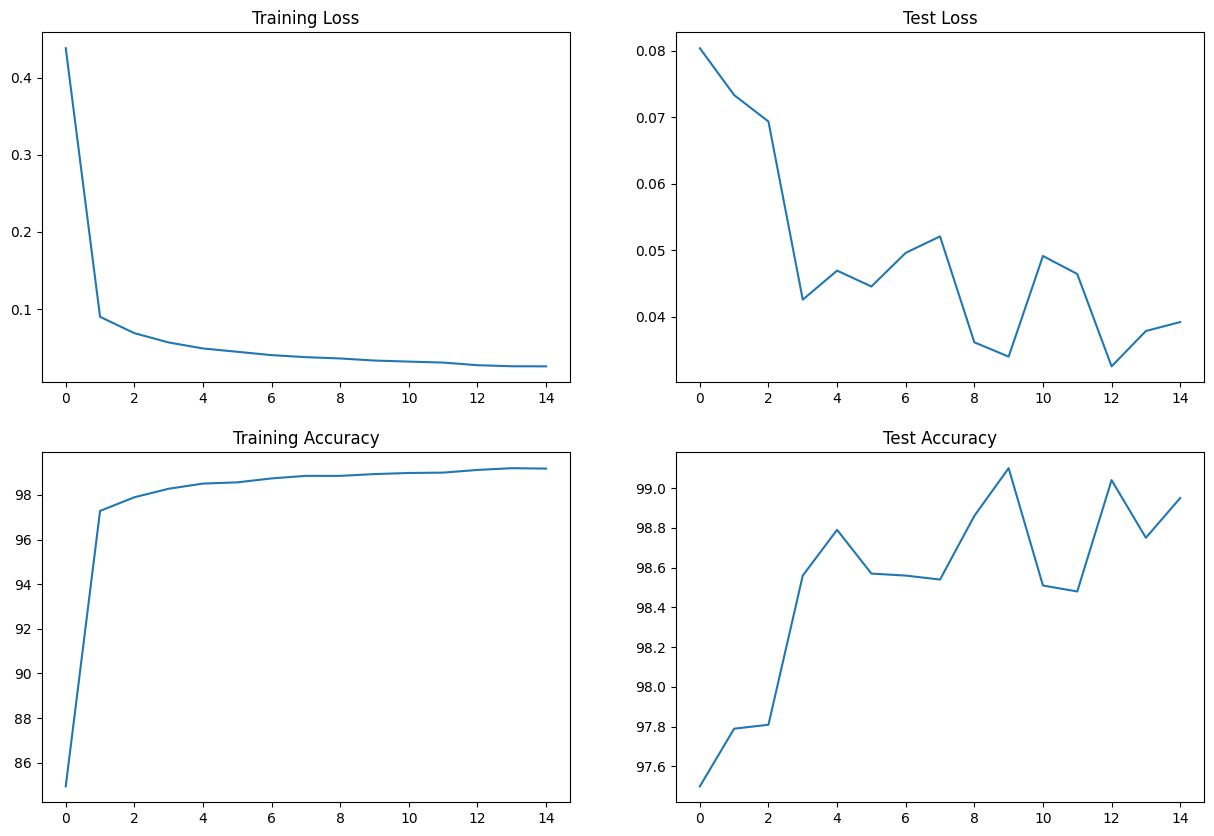

In [14]:
# Plot the accuracy and loss graphs using data and plot_train_test_metrics() from model.py
fig, axs = plot_train_test_metrics(train_losses, train_acc, test_losses, test_acc)
plt.show()